<a href="https://colab.research.google.com/github/swoo-nam/project_final_team1/blob/main/%EC%A0%95%EC%88%98%EC%9D%B8_%EC%84%9C%EB%B9%84%EC%8A%A42_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%EB%B0%8F%EC%A6%9D%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data/"
SEED = 42

In [ ]:
!pip install translate

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
torch.cuda.is_available()

False

In [ ]:
!pip install transformers

In [ ]:
!pip install kiwipiepy

데이터 정제 및 전처리

In [ ]:
rawyogiyo_df = pd.read_csv(f"{DATA_PATH}yogiyo_reviews_0908.csv")
yogiyo_df = rawyogiyo_df.copy()
yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다💖 \n\n보람차게 일할 수 있게 해 주...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요:),5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다!😄 \n\n맛있는 메뉴를 넉넉하게 먹을 수 ...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? \n\n1. 고객을 생각하는 마음 \n2...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요!😁\n\n고객님의 행복...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 ㅎ저번에주문하고 맛있어서또주문핰건데\n늦은시간에시켜서그렄지 국물이 엄청 걸...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다~~^-^\n소중한 리뷰 너무 감사합니다!!🙂\n재주문...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 짬뽕관입니다!!^_^\n소중한 리뷰 남겨주셔 서 정말 달감사합니다!...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다~~^_^\n맛있게 드셨다는 말씀에 힘이 나는거 같습니...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다!!^_^\n맛있게 드셔주시고 정성스러운 사진 리뷰까지...,"차슈짬뽕,마파두부밥"


In [ ]:
yogiyo_df["고객리뷰"] = yogiyo_df["고객리뷰"].str.replace("[^가-힣0-9 .,!?]" , " ",regex=True)
yogiyo_df["사장댓글"] = yogiyo_df["사장댓글"].str.replace("[^가-힣0-9 .,!?]" , " ",regex=True)

yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요,5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 ...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 저번에주문하고 맛있어서또주문핰건데 늦은시간에시켜서그렄지 국물이 엄청 걸쭉...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다 소중한 리뷰 너무 감사합니다!! 재주문해 ...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 짬뽕관입니다!! 소중한 리뷰 남겨주셔 서 정말 달감사합니다!!...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다 맛있게 드셨다는 말씀에 힘이 나는거 같습니다...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다!! 맛있게 드셔주시고 정성스러운 사진 리뷰까지 ...,"차슈짬뽕,마파두부밥"


가게 이름 제거

In [ ]:
ygy_store_lst = set(rawyogiyo_df["가게이름"])
len(ygy_store_lst)

167

In [ ]:
ygy_store_lst = [re.split("[-,& ]", i ) for i in ygy_store_lst]

In [ ]:
ygy_store_lst = sum(ygy_store_lst, [])

In [ ]:
additional = ["당신은", "치킨이", "땡긴다", "치킨", "1988응답하라", '1988응답하라추억의옛날도시락의', "1988응답하라추억의옛날도시락입니다.","1988응답하라추억의옛날도시락을", "짬뽕관입니다", "짬뽕관입니다!!", "짬뽕관입니다,", "짬뽕관입니다!", "짬뽕관입니다."]
ygy_store_lst = ygy_store_lst + additional

In [ ]:
'치킨이' in ygy_store_lst

True

In [ ]:
text = '저희 1988응답하라추억의옛날도시락의 메뉴를 선택해 주셔서 감사합니다. 많이 짜셨을까요? 조리 과정을 다시 살펴 보고, 미흡했던 점은 없었는지 확인 하도록 하겠습니다. 그리고 다음에 오실 때 요청 사항에 이 내용 남겨주시면, 저희가 더 신경을 쓸 수 있도록 하겠습니다. 그땐 꼭 온전한 만족감을 드릴 수 있도록 최선을 다하겠습니다. 감사합니다.'
text_words = text.split()
[word for word in text_words if word not in ygy_store_lst]

['저희',
 '메뉴를',
 '선택해',
 '주셔서',
 '감사합니다.',
 '많이',
 '짜셨을까요?',
 '조리',
 '과정을',
 '다시',
 '살펴',
 '보고,',
 '미흡했던',
 '점은',
 '없었는지',
 '확인',
 '하도록',
 '하겠습니다.',
 '그리고',
 '다음에',
 '오실',
 '때',
 '요청',
 '사항에',
 '이',
 '내용',
 '남겨주시면,',
 '저희가',
 '더',
 '신경을',
 '쓸',
 '수',
 '있도록',
 '하겠습니다.',
 '그땐',
 '꼭',
 '온전한',
 '만족감을',
 '드릴',
 '수',
 '있도록',
 '최선을',
 '다하겠습니다.',
 '감사합니다.']

In [ ]:
new_replys = []

for reply in yogiyo_df["사장댓글"]:

  words = reply.split(" ")
  new_words = []

  new_reply_words = [word for word in words if word not in ygy_store_lst]
  new_reply = ' '.join(new_reply_words)

  new_replys.append(new_reply)

yogiyo_df["사장댓글"] = new_replys
yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서 감사...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요,5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는 것보...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더 나은...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 시간...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 저번에주문하고 맛있어서또주문핰건데 늦은시간에시켜서그렄지 국물이 엄청 걸쭉...,5,5.0,5.0,5.0,고객님 안녕하세요 소중한 리뷰 너무 감사합니다!! 재주문해 주셨는데 국물양이 살짝 ...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 소중한 리뷰 남겨주셔 서 정말 달감사합니다!! 만족스러운 식사가 되...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셔주시고 정성스러운 사진 리뷰까지 정말 감사합니다 매일매...,"차슈짬뽕,마파두부밥"


 ** 님 고객님으로 수정

In [ ]:
yogiyo_df["사장댓글"] = yogiyo_df["사장댓글"].str.replace(r'\w+\s*님', '고객님', regex=True)
yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서 감사...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요,5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는 것보...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더 나은...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 시간...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 저번에주문하고 맛있어서또주문핰건데 늦은시간에시켜서그렄지 국물이 엄청 걸쭉...,5,5.0,5.0,5.0,고객님 안녕하세요 소중한 리뷰 너무 감사합니다!! 재주문해 주셨는데 국물양이 살짝 ...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 소중한 리뷰 남겨주셔 서 정말 달감사합니다!! 만족스러운 식사가 되...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셔주시고 정성스러운 사진 리뷰까지 정말 감사합니다 매일매...,"차슈짬뽕,마파두부밥"


In [ ]:
yogiyo_df["고객리뷰"] = [' '.join(i.split()) for i in yogiyo_df["고객리뷰"]]
yogiyo_df["사장댓글"] = [' '.join(i.split()) for i in yogiyo_df["사장댓글"]]

낮은 별점 데이터 증강  
별점 4점이하인 데이터들을 증강하고 학습을 시켜보고자함  

텍스트 데이터 불균형 해소를 위한 증강 방법
1. Random deletion
2. Random swap
3. Back translation


In [ ]:
rate_counts = yogiyo_df["별점"].value_counts().sort_index(ascending=False)
rate_counts

5    35164
4     1234
3      385
2      137
1      220
Name: 별점, dtype: int64

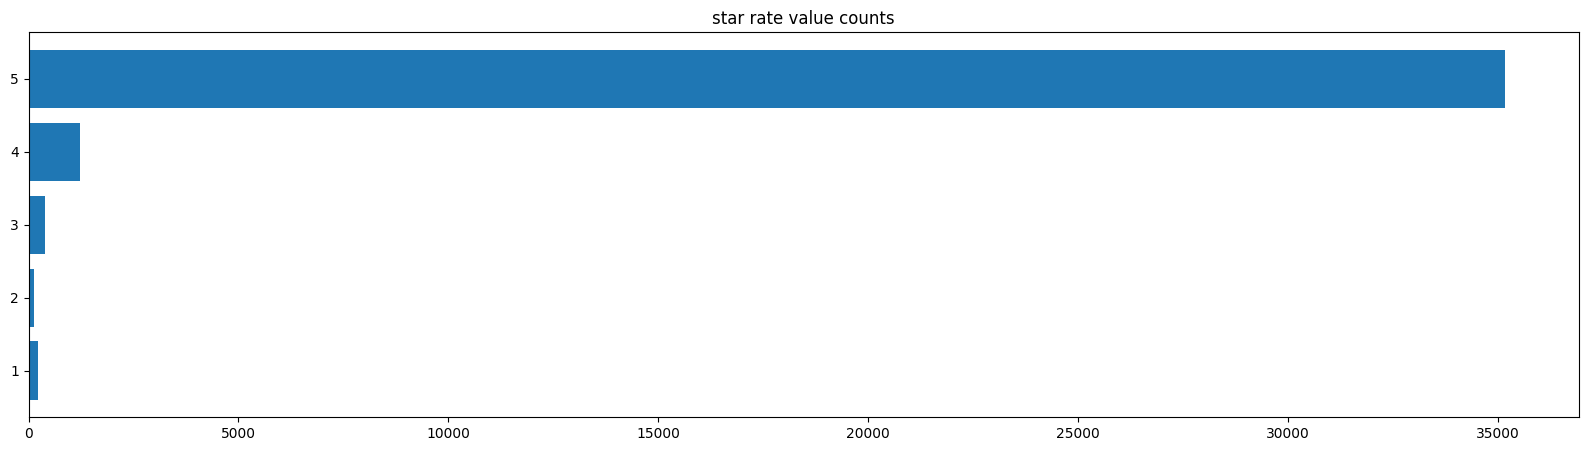

In [ ]:
plt.figure(figsize=(20, 5))
plt.barh([5,4,3,2,1], rate_counts)
plt.title("star rate value counts")
plt.show()

In [ ]:
########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################

def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

In [ ]:
########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################

def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

In [ ]:
from translate import Translator

ko = "진짜리뷰안쓰는데 양이 2만원씩내고 먹을양은 절대아닙니다 장난하는것도아니고"

translator_ko2en = Translator(to_lang="en", from_lang="ko")
translator_en2ko = Translator(to_lang="ko", from_lang="en")
translator_ko2ja = Translator(to_lang="ja", from_lang="ko")
translator_ja2ko = Translator(to_lang="ko", from_lang="ja")

ko2en = translator_ko2en.translate(ko)
en2ko = translator_en2ko.translate(ko2en)
ko2ja = translator_ko2ja.translate(ko)
ja2ko = translator_ja2ko.translate(ko2ja)

print (f"원문 : {ko}")
print (f"번역문 : {ko2en}")
print (f"역번역문 : {en2ko}")
print (f"번역문 : {ko2ja}")
print (f"역번역문 : {ja2ko}")


원문 : 진짜리뷰안쓰는데 양이 2만원씩내고 먹을양은 절대아닙니다 장난하는것도아니고
번역문 : I don't really use reviews, but the amount costs 20,000 won and it's never the amount to eat. I'm not kidding.
역번역문 : 후기를 잘 안쓰는데 금액이 2만원이고 절대 먹을 금액이 아닙니다. 농담이 아닙니다.
번역문 : レビューはあまり使っていませんが、金額は2万ウォンで、決して食べる量ではありません。冗談ではありません。
역번역문 : 후기는 많이 쓰지 않지만 금액이 2만원이라 절대 먹기에 부족함이 없습니다. 농담이 아닙니다.


In [ ]:
# Back Transration
# 너무~ 오래걸려~~
# 포기~~

def back_transration(words):

  translator_ko2en = Translator(to_lang="en", from_lang="ko")
  translator_en2ko = Translator(to_lang="ko", from_lang="en")
  translator_ko2ja = Translator(to_lang="ja", from_lang="ko")
  translator_ja2ko = Translator(to_lang="ko", from_lang="ja")
  # translator_ko2cn = Translator(to_lang="zh-cn", from_lang="ko")
  # translator_cn2ko = Translator(to_lang="ko", from_lang="zh-cn")

  ko2en = translator_ko2en.translate(words)
  en2ko_words = translator_en2ko.translate(ko2en)
  ko2ja = translator_ko2ja.translate(words)
  ja2ko_words = translator_ja2ko.translate(ko2ja)
  # ko2cn = translator_ko2cn.translate(words)
  # cn2ko_words = translator_cn2ko.translate(ko2cn)

  return [en2ko_words, ja2ko_words]

In [ ]:
from torch.cuda.random import seed
def EDA(sentence, alpha_rs=0.1, p_rd=0.2, num_aug = 4):

  # Back transration
  # bt = back_transration(sentence)
  # augmented_sentences = list(set(bt))

  new_sentences = []
  words = sentence.split(' ')
  num_words = len(words)

  if num_words > 5 :

    n_rs = max(1, int(alpha_rs*num_words))

    # Random deletion
    for _ in range(num_aug):
      a_words = random_deletion(words, p_rd)
      new_sentences.append(" ".join(a_words))

    # Random swap
    for _ in range(num_aug):
      a_words = random_swap(words, n_rs)
      new_sentences.append(" ".join(a_words))

    return new_sentences

  else : return [sentence]


In [ ]:
yogiyo_df["고객리뷰"][1]

'기름 있는 부분이 생각보다 많아요! 참고하세요'

In [ ]:
sentence = yogiyo_df["고객리뷰"][1]
EDA(sentence)

['기름 있는 부분이 생각보다 참고하세요',
 '부분이 생각보다 많아요! 참고하세요',
 '기름 있는 부분이 많아요! 참고하세요',
 '기름 있는 생각보다 참고하세요',
 '많아요! 있는 부분이 생각보다 기름 참고하세요',
 '기름 있는 부분이 많아요! 생각보다 참고하세요',
 '참고하세요 있는 부분이 생각보다 많아요! 기름',
 '기름 있는 생각보다 부분이 많아요! 참고하세요']

In [ ]:
mask = yogiyo_df["별점"] < 5
neg_df = yogiyo_df[mask][["고객리뷰", "사장댓글"]].copy()
neg_df.reset_index(drop = True, inplace=True)
neg_df

,고객리뷰,사장댓글
0,맛있습니다! 근데 국물이 안와서 아쉽습니다..,안녕하세요 저희 측 실수로 인하여 누락이 되었군요... 이에 대해서 사과 말씀 드립...
1,저저번달에 맛있게 먹어서 또 시켰는데 고기 양이 엄청 줄었네요 ..된장찌개도 엄청 ...,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...
2,20분 이내 배달 알림 주시고는 한시간이 지나서야 받았습니다. 배달이 늦는 점에 대...,안녕하세요 입니다. 남겨 주신 리뷰 잘 읽어보았습니다. 먼저 매장 상황을 잘 파악하...
3,맛이나 양은 무난해요 그런데... 배달예정시간이 무색하게 늦게도착 차라리 배달 예정...,선택해 주셔서 감사합니다. 저희 매장에서는 배달로 드릴 때 배달 시간을 지키기 위해...
4,"메인은 좋았는데, 아... 반찬이 다 쉬어 모두 버렸어요 한번 씹는데 촉감,맛이 이...",안녕하세요 입니다. 우선 감사하게도 저희 매장을 찾아 주셨는데 불편함을 겪게 해드려...
...,...,...
1971,짜장 춘장맛만 나는 짬뽕 맛있게 매운 군만두 넹,저희 짬뽕관을 이용해 주셔서 감사합니다. 다음 주문은 더 맛있게 조리하여 별점 다섯...
1972,탕수육은 비추. 돌 같은 식감 짬뽕은 맛있어요,저희 짬뽕관을 이용해 주셔서 감사합니다. 우선 식사시간에 아쉬움을 드려 정말 죄송합...
1973,잘먹었습니다 감사합니다,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...
1974,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 만원짜리 짬뽕인가요? 와 장...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...


In [ ]:
eda_reviews = {"고객리뷰":[], "사장댓글":[]}

for _, row  in tqdm(neg_df.iterrows(), total = neg_df.shape[0]):
  num = len(EDA(row["고객리뷰"]))
  eda_reviews["고객리뷰"].extend(EDA(row["고객리뷰"]))
  eda_reviews["사장댓글"].extend([ row["사장댓글"] for i in range(num)])


  0%|          | 0/1976 [00:00<?, ?it/s]

In [ ]:
len(eda_reviews["고객리뷰"]), len(eda_reviews["사장댓글"])

(10894, 10894)

In [ ]:
eda_df = pd.DataFrame(eda_reviews)
eda_df

,고객리뷰,사장댓글
0,맛있습니다! 근데 국물이 안와서 아쉽습니다..,안녕하세요 저희 측 실수로 인하여 누락이 되었군요... 이에 대해서 사과 말씀 드립...
1,저저번달에 맛있게 먹어서 또 시켰는데 고기 엄청 줄었네요 ..된장찌개도 엄청 그래도...,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...
2,저저번달에 맛있게 먹어서 또 시켰는데 고기 양이 엄청 줄었네요 ..된장찌개도 짜고 ...,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...
3,저저번달에 먹어서 또 시켰는데 고기 양이 ..된장찌개도 엄청 짜고 그래도 맛은 있었어요,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...
4,맛있게 먹어서 시켰는데 고기 양이 엄청 줄었네요 ..된장찌개도 엄청 짜고 그래도 맛...,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...
...,...,...
10889,요기요 짬뽕이라 맛있어보여시킨건데 홍합 이건 이게 만원짜리 짬뽕인가요? 와 장사너무...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...
10890,조개는 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 요기요 짬뽕인가요? 와 장사...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...
10891,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 만원짜리 짬뽕인가요? 큰일날...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...
10892,요기요 사진보고 맛있어보여시킨건데 너무하잖아 카랄하지도않고 이게 만원짜리 짬뽕인가요...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...


In [ ]:
df = pd.concat( [yogiyo_df[["고객리뷰", "사장댓글"]], eda_df])
df = df.sample(frac=1).reset_index(drop=True)
df

,고객리뷰,사장댓글
0,양도 많고 치킨이 다 맛있어서 또 먹을것 같아요!,안녕하세요 고객님 맛있게 준비하고 기다리겠습니다! 다음에 또 주문해 주세요
1,제주도에서 먹어보고 전주에도 있길래 바로 시켜먹었어요,리뷰감사합니다!! 죄송하지만 어떤점이 마음에 안드셧는지 여쭤봐도 될까용...? 저희...
2,맛있게잘먹었습니다. 이화수육개장은 가서만 먹어보다가 주문해서먹었는데 맛있었어요 물론...,고객님 배달도 맛있게 식사해주셔서 감사합니다.. 요즘시국에 매장오기 어려우실텐데 배...
3,굿임니다 굿이에용 !!,맛있게 드셨다니 감사해요. 언제드셔도 기분좋고 맛있게 드실수있도록 준비해드릴께요. ...
4,맛나요 자주시켜먹어요,언제나 콩샌 잊지않고 찾아주셔서 진심으로 감사합니다 항상 정성껏 맛있게 드실수 있도...
...,...,...
48029,맛나게 잘 먹었어요 많이 파세요,맛있게 드셨다니 감사해요. 언제드셔도 기분좋고 맛있게 드실수있도록 준비해드릴께요. ...
48030,양 진짜많고 대대대존맛 마라샹궈 완전 강추해요 흡입해서 사진이없어여 또시킬꺼에여!!...,맛있게 드셔주셔서 감사합니다 요청사항은 조리전 늘 꼼꼼하게 체크하고 있으니 필요하신...
48031,오우.. 재료도 신선하고 가성비 좋은것 같아요! 서비스로 주시는 쥬스도 맛있어요!,안녕하세요! 항상 신선한 재료로 맛있는 샐러드전달드릴려구 노력하고있습니다 맛과 양 ...
48032,양 엄청 많고요 맛도 있어서 좋아요 가성비도 좋다고 생각해요 잘 먹었습미다,소중한 리뷰작성 진심으로 감사드립니다 저희 진지덮밥을 찾아주셔서 너무나 감사합니다 ...


In [ ]:
df.to_csv(f"{DATA_PATH}preprocessed_df.csv", index =False)

In [ ]:
pd.read_csv(f"{DATA_PATH}preprocessed_df.csv")

,고객리뷰,사장댓글
0,양도 많고 치킨이 다 맛있어서 또 먹을것 같아요!,안녕하세요 고객님 맛있게 준비하고 기다리겠습니다! 다음에 또 주문해 주세요
1,제주도에서 먹어보고 전주에도 있길래 바로 시켜먹었어요,리뷰감사합니다!! 죄송하지만 어떤점이 마음에 안드셧는지 여쭤봐도 될까용...? 저희...
2,맛있게잘먹었습니다. 이화수육개장은 가서만 먹어보다가 주문해서먹었는데 맛있었어요 물론...,고객님 배달도 맛있게 식사해주셔서 감사합니다.. 요즘시국에 매장오기 어려우실텐데 배...
3,굿임니다 굿이에용 !!,맛있게 드셨다니 감사해요. 언제드셔도 기분좋고 맛있게 드실수있도록 준비해드릴께요. ...
4,맛나요 자주시켜먹어요,언제나 콩샌 잊지않고 찾아주셔서 진심으로 감사합니다 항상 정성껏 맛있게 드실수 있도...
...,...,...
48029,맛나게 잘 먹었어요 많이 파세요,맛있게 드셨다니 감사해요. 언제드셔도 기분좋고 맛있게 드실수있도록 준비해드릴께요. ...
48030,양 진짜많고 대대대존맛 마라샹궈 완전 강추해요 흡입해서 사진이없어여 또시킬꺼에여!!...,맛있게 드셔주셔서 감사합니다 요청사항은 조리전 늘 꼼꼼하게 체크하고 있으니 필요하신...
48031,오우.. 재료도 신선하고 가성비 좋은것 같아요! 서비스로 주시는 쥬스도 맛있어요!,안녕하세요! 항상 신선한 재료로 맛있는 샐러드전달드릴려구 노력하고있습니다 맛과 양 ...
48032,양 엄청 많고요 맛도 있어서 좋아요 가성비도 좋다고 생각해요 잘 먹었습미다,소중한 리뷰작성 진심으로 감사드립니다 저희 진지덮밥을 찾아주셔서 너무나 감사합니다 ...
